# <center> Global COVID-19 Vaccination Analysis <center>

# About Dataset

## Dataset Description

Country-by-country data on global COVID-19 vaccinations. We only rely on figures that are verifiable based on public official sources.

This dataset includes some subnational locations (England, Northern Ireland, Scotland, Wales, Northern Cyprus…) and international aggregates (World, continents, European Union…). They can be identified by their iso_code that starts with OWID_.

## Columns Description

| Column Name | Description |
| :------- | :------- |
| location | Name of the country (or region within a country) |
| iso_code | ISO 3166-1 alpha-3 – three-letter country codes |
| date | Date of the observation |
| total_vaccinations | Total number of doses administered. For vaccines that require multiple doses, each individual dose is counted. If a person receives one dose of the vaccine, this metric goes up by 1. If they receive a second dose, it goes up by 1 again. If they receive a third/booster dose, it goes up by 1 again |
| people_vaccinated | Total number of people who received at least one vaccine dose. If a person receives the first dose of a 2-dose vaccine, this metric goes up by 1. If they receive the second dose, the metric stays the same |
| people_fully_vaccinated | Total number of people who received all doses prescribed by the initial vaccination protocol. If a person receives the first dose of a 2-dose vaccine, this metric stays the same. If they receive the second dose, the metric goes up by 1 |
| total_boosters | Total number of COVID-19 vaccination booster doses administered (doses administered beyond the number prescribed by the initial vaccination protocol) |
| daily_vaccinations_raw | Daily change in the total number of doses administered. It is only calculated for consecutive days. This is a raw measure provided for data checks and transparency, but we strongly recommend that any analysis on daily vaccination rates be conducted using daily_vaccinations instead |
| daily_vaccinations | New doses administered per day (7-day smoothed). For countries that don't report data on a daily basis, we assume that doses changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window |
| total_vaccinations_per_hundred | total_vaccinations per 100 people in the total population of the country |
| people_vaccinated_per_hundred | people_vaccinated per 100 people in the total population of the country |
| people_fully_vaccinated_per_hundred | people_fully_vaccinated per 100 people in the total population of the country |
| total_boosters_per_hundred | total_boosters per 100 people in the total population of the country |
| daily_vaccinations_per_million | daily_vaccinations per 1,000,000 people in the total population of the country |
| daily_people_vaccinated | daily number of people receiving a first COVID-19 vaccine dose (7-day smoothed) |
| daily_people_vaccinated_per_hundred | daily_people_vaccinated per 100 people in the total population of the country |

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
df = pd.read_csv(r"vaccinations.csv") # Load the Dataset

In [3]:
df.head() # Display the first few rows of the dataset

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003


In [4]:
df.info() # Check the data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196246 entries, 0 to 196245
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   location                             196246 non-null  object 
 1   iso_code                             196246 non-null  object 
 2   date                                 196246 non-null  object 
 3   total_vaccinations                   85417 non-null   float64
 4   people_vaccinated                    81132 non-null   float64
 5   people_fully_vaccinated              78061 non-null   float64
 6   total_boosters                       53600 non-null   float64
 7   daily_vaccinations_raw               70971 non-null   float64
 8   daily_vaccinations                   195029 non-null  float64
 9   total_vaccinations_per_hundred       85417 non-null   float64
 10  people_vaccinated_per_hundred        81132 non-null   float64
 11  people_fully_

In [5]:
df.describe(include='all')

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
count,196246,196246,196246,8.541700e+04,8.113200e+04,7.806100e+04,5.360000e+04,7.097100e+04,1.950290e+05,85417.000000,81132.000000,78061.000000,53600.000000,195029.000000,1.921770e+05,192177.000000
unique,235,235,1352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Europe,OWID_EUR,2021-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1352,1352,232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,5.616980e+08,2.487064e+08,2.286639e+08,1.505811e+08,7.398640e+05,2.838758e+05,124.279558,53.501409,48.680182,36.301489,1851.477596,1.060707e+05,0.074980
std,NaN,NaN,NaN,1.842160e+09,8.006461e+08,7.403763e+08,4.360697e+08,3.183064e+06,1.922352e+06,85.098042,29.379655,29.042282,30.218208,3117.828731,7.866884e+05,0.176216
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,NaN,NaN,NaN,1.970788e+06,1.050009e+06,9.644000e+05,6.022820e+05,2.010000e+03,2.790000e+02,44.770000,27.880000,21.220000,5.920000,106.000000,4.300000e+01,0.001000
50%,NaN,NaN,NaN,1.439435e+07,6.901088e+06,6.191345e+06,5.765440e+06,2.053100e+04,3.871000e+03,130.550000,64.300000,57.920000,35.905000,605.000000,7.710000e+02,0.014000
75%,NaN,NaN,NaN,1.161972e+08,5.093295e+07,4.773185e+07,4.019072e+07,1.736115e+05,3.180300e+04,194.990000,77.780000,73.610000,57.620000,2402.000000,9.307000e+03,0.073000


# Data Cleaning

In [6]:
df.isnull().sum() # Check for missing values

location                                    0
iso_code                                    0
date                                        0
total_vaccinations                     110829
people_vaccinated                      115114
people_fully_vaccinated                118185
total_boosters                         142646
daily_vaccinations_raw                 125275
daily_vaccinations                       1217
total_vaccinations_per_hundred         110829
people_vaccinated_per_hundred          115114
people_fully_vaccinated_per_hundred    118185
total_boosters_per_hundred             142646
daily_vaccinations_per_million           1217
daily_people_vaccinated                  4069
daily_people_vaccinated_per_hundred      4069
dtype: int64

In [7]:
df.isnull().sum().sum() # Total number of missing values

np.int64(1109395)

In [8]:
df.duplicated().sum() # Check for duplicate rows

np.int64(0)

In [9]:
df['date'] = pd.to_datetime(df['date']) # Convert date to datetime

In [16]:
# Drop unnecessary columns
columns_needed = ['location', 'date', 'total_vaccinations_per_hundred', 'total_vaccinations','people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'daily_vaccinations_per_million', 'daily_people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']

In [17]:
df = df[columns_needed]

In [18]:
# Remove rows where target is null
df = df.dropna(subset=['people_fully_vaccinated_per_hundred'])

In [19]:
# Drop aggregates like "World", "Asia", etc.
exclude_list = ['World', 'Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Low income', 'Lower middle income', 'North America', 'Oceania', 'South America', 'Upper middle income', 'International']
df = df[~df['location'].isin(exclude_list)]

In [20]:
# Replace all NaN values with 0
df = df.fillna(0)

In [21]:
df.isnull().sum()

location                               0
date                                   0
total_vaccinations_per_hundred         0
total_vaccinations                     0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
total_boosters_per_hundred             0
daily_vaccinations_per_million         0
daily_people_vaccinated_per_hundred    0
people_fully_vaccinated_per_hundred    0
dtype: int64

In [22]:
df.head() # Show cleaned data

,location,date,total_vaccinations_per_hundred,total_vaccinations,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
78,Afghanistan,2021-05-11,1.23,504502.0,1.09,0.14,0.0,338.0,0.027,0.14
87,Afghanistan,2021-05-20,1.33,547901.0,1.14,0.19,0.0,117.0,0.006,0.19
91,Afghanistan,2021-05-24,1.39,573277.0,1.16,0.24,0.0,138.0,0.005,0.24
93,Afghanistan,2021-05-26,1.44,590454.0,1.17,0.27,0.0,165.0,0.004,0.27
94,Afghanistan,2021-05-27,1.44,593313.0,1.17,0.28,0.0,158.0,0.003,0.28


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62980 entries, 78 to 196245
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   location                             62980 non-null  object        
 1   date                                 62980 non-null  datetime64[ns]
 2   total_vaccinations_per_hundred       62980 non-null  float64       
 3   total_vaccinations                   62980 non-null  float64       
 4   people_vaccinated_per_hundred        62980 non-null  float64       
 5   people_fully_vaccinated_per_hundred  62980 non-null  float64       
 6   total_boosters_per_hundred           62980 non-null  float64       
 7   daily_vaccinations_per_million       62980 non-null  float64       
 8   daily_people_vaccinated_per_hundred  62980 non-null  float64       
 9   people_fully_vaccinated_per_hundred  62980 non-null  float64       
dtypes: datetime64

In [24]:
# Save cleaned data
df.to_csv(r'cleaned_vaccinations.csv', index=False)

In [25]:
# Load the cleaned dataset
df = pd.read_csv(r'cleaned_vaccinations.csv')

# Exploratory Data Analysis (EDA)

<h2> Univariant Analysis <h2>

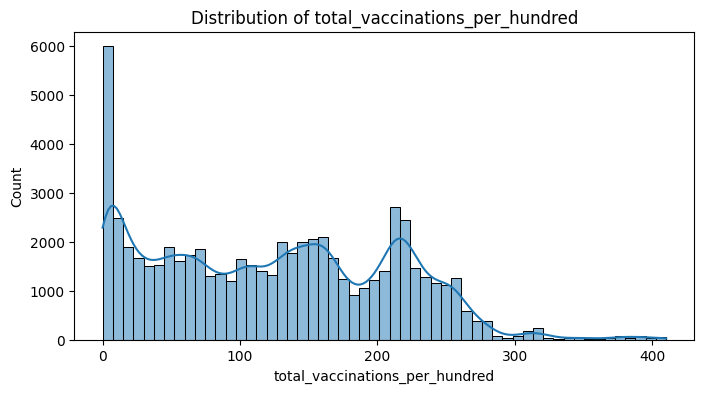

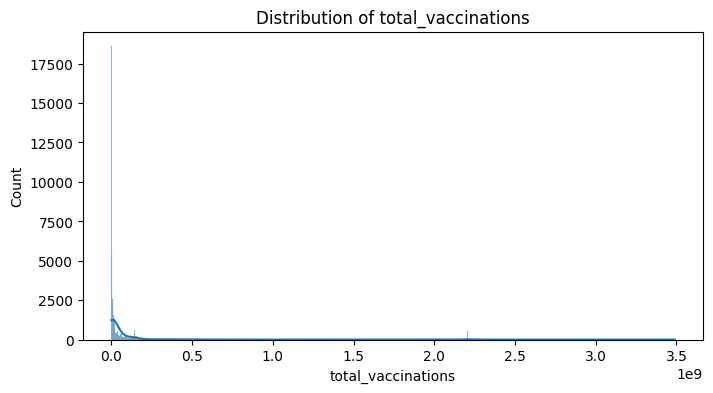

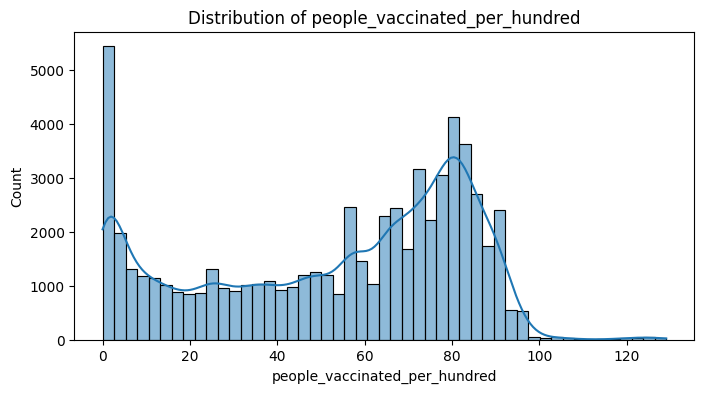

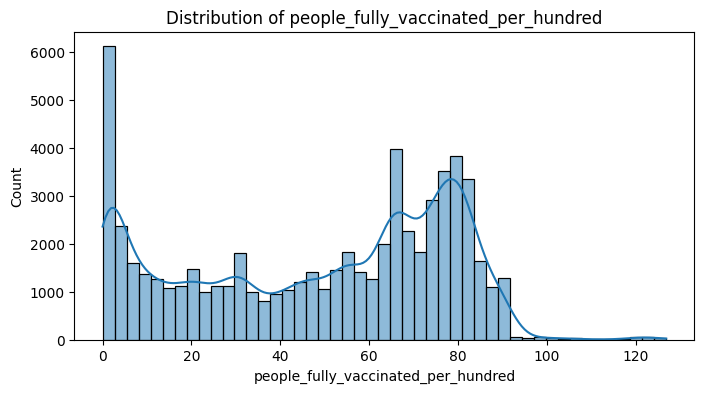

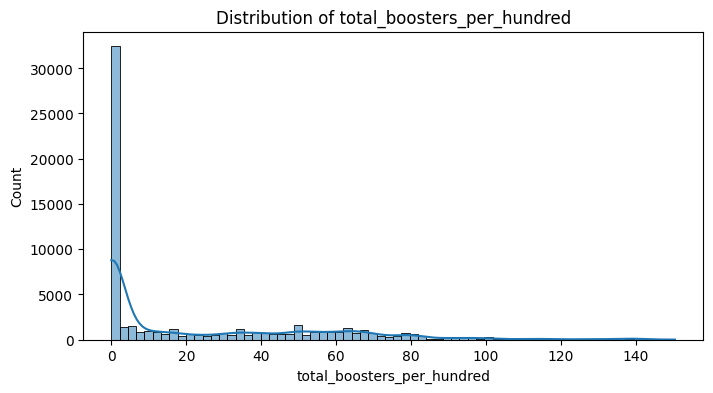

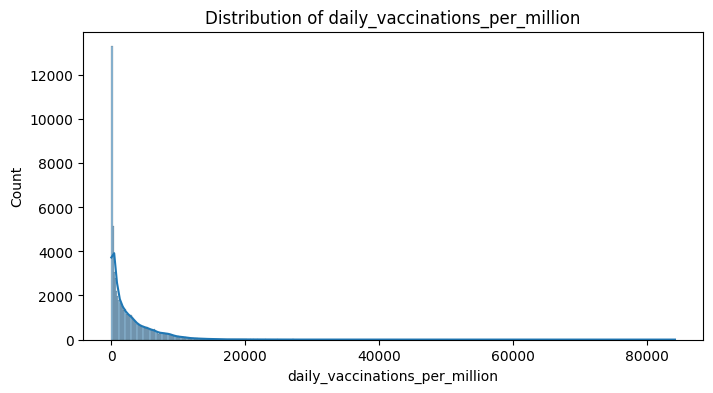

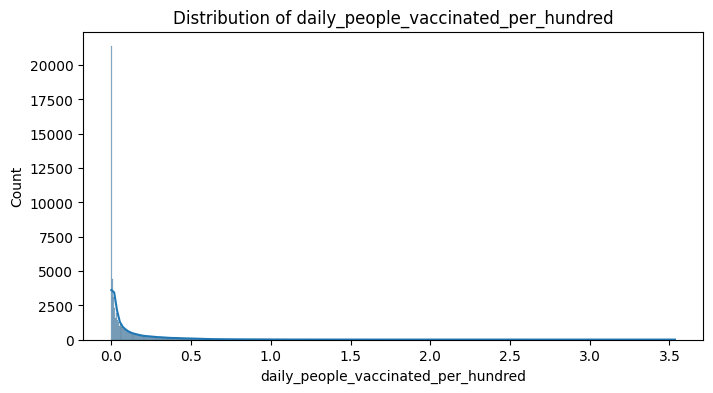

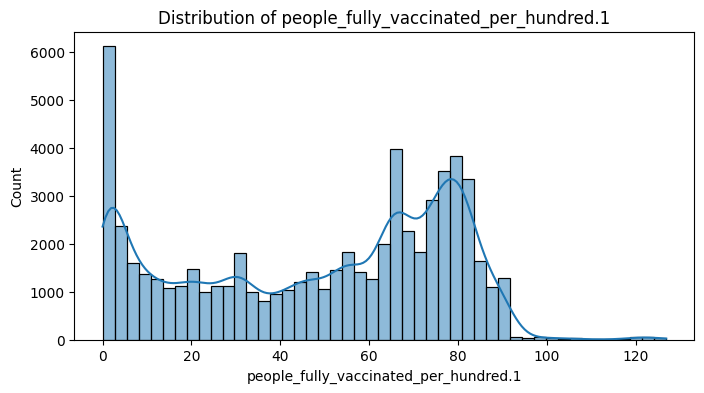

In [ ]:
# Distribution Plots for Numerical Features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

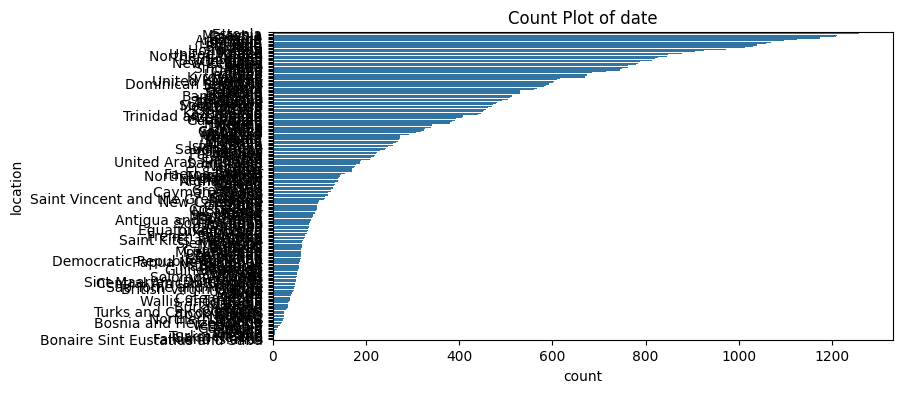

In [ ]:
# Count Plots for Categorical Features
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y=df['location'], order=df['location'].value_counts().index)
plt.title(f'Count Plot of {col}')
plt.show()

<h3> Univariate Analysis <h3>

Univariate analysis looked at one feature at a time to understand the distributions:

- High skewness was observed in vaccination metrics like:

    - total_vaccinations
    - people_fully_vaccinated_per_hundred
    - daily_vaccinations_per_million

- A large number of missing values were initially present in columns like total_boosters, people_fully_vaccinated, etc., which were cleaned before deeper analysis.

- Countries like India, USA, and China stood out with very high total vaccination counts.

- Smaller nations (e.g., Gibraltar, Falkland Islands) dominated in terms of per-hundred vaccination rates, showing high relative performance despite smaller population sizes.

<h2> Multivariate Analysis Summary<h2>

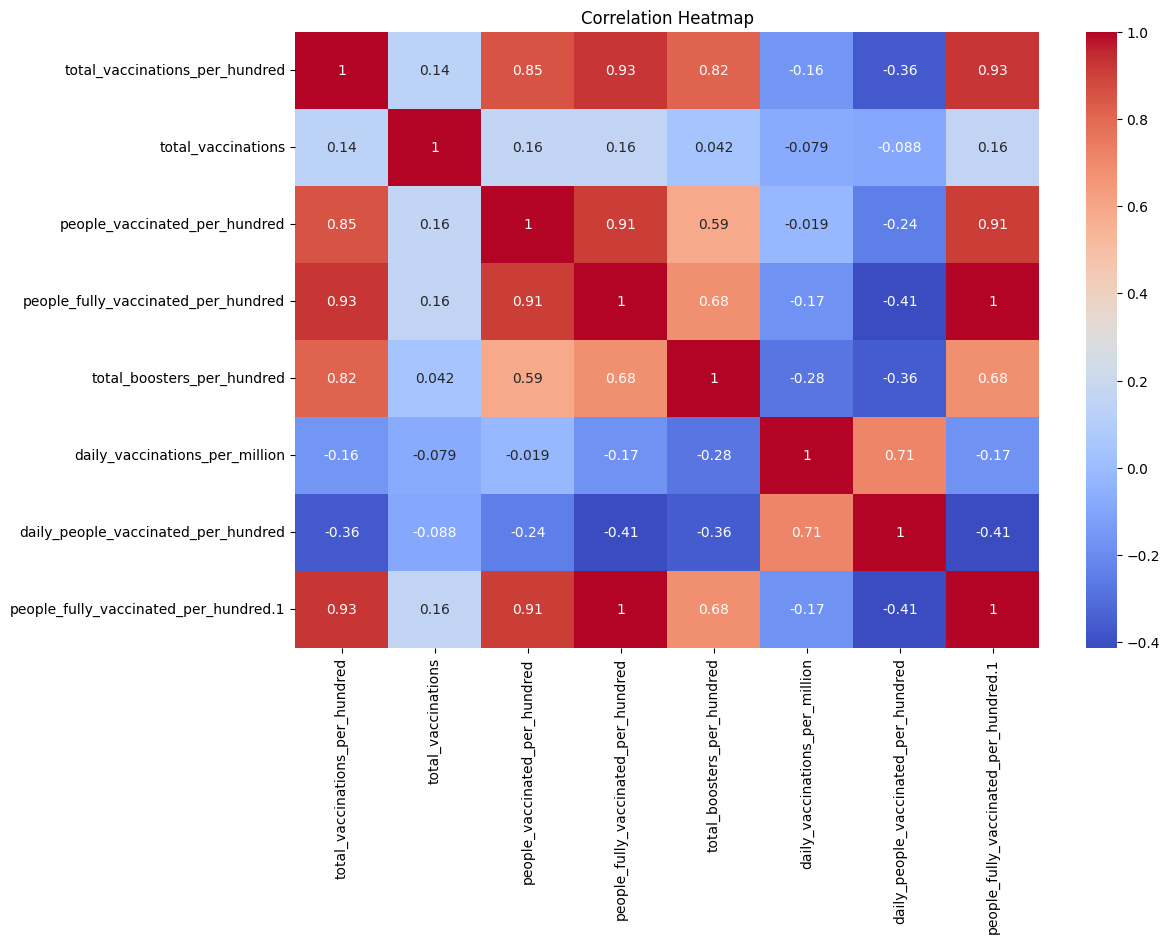

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

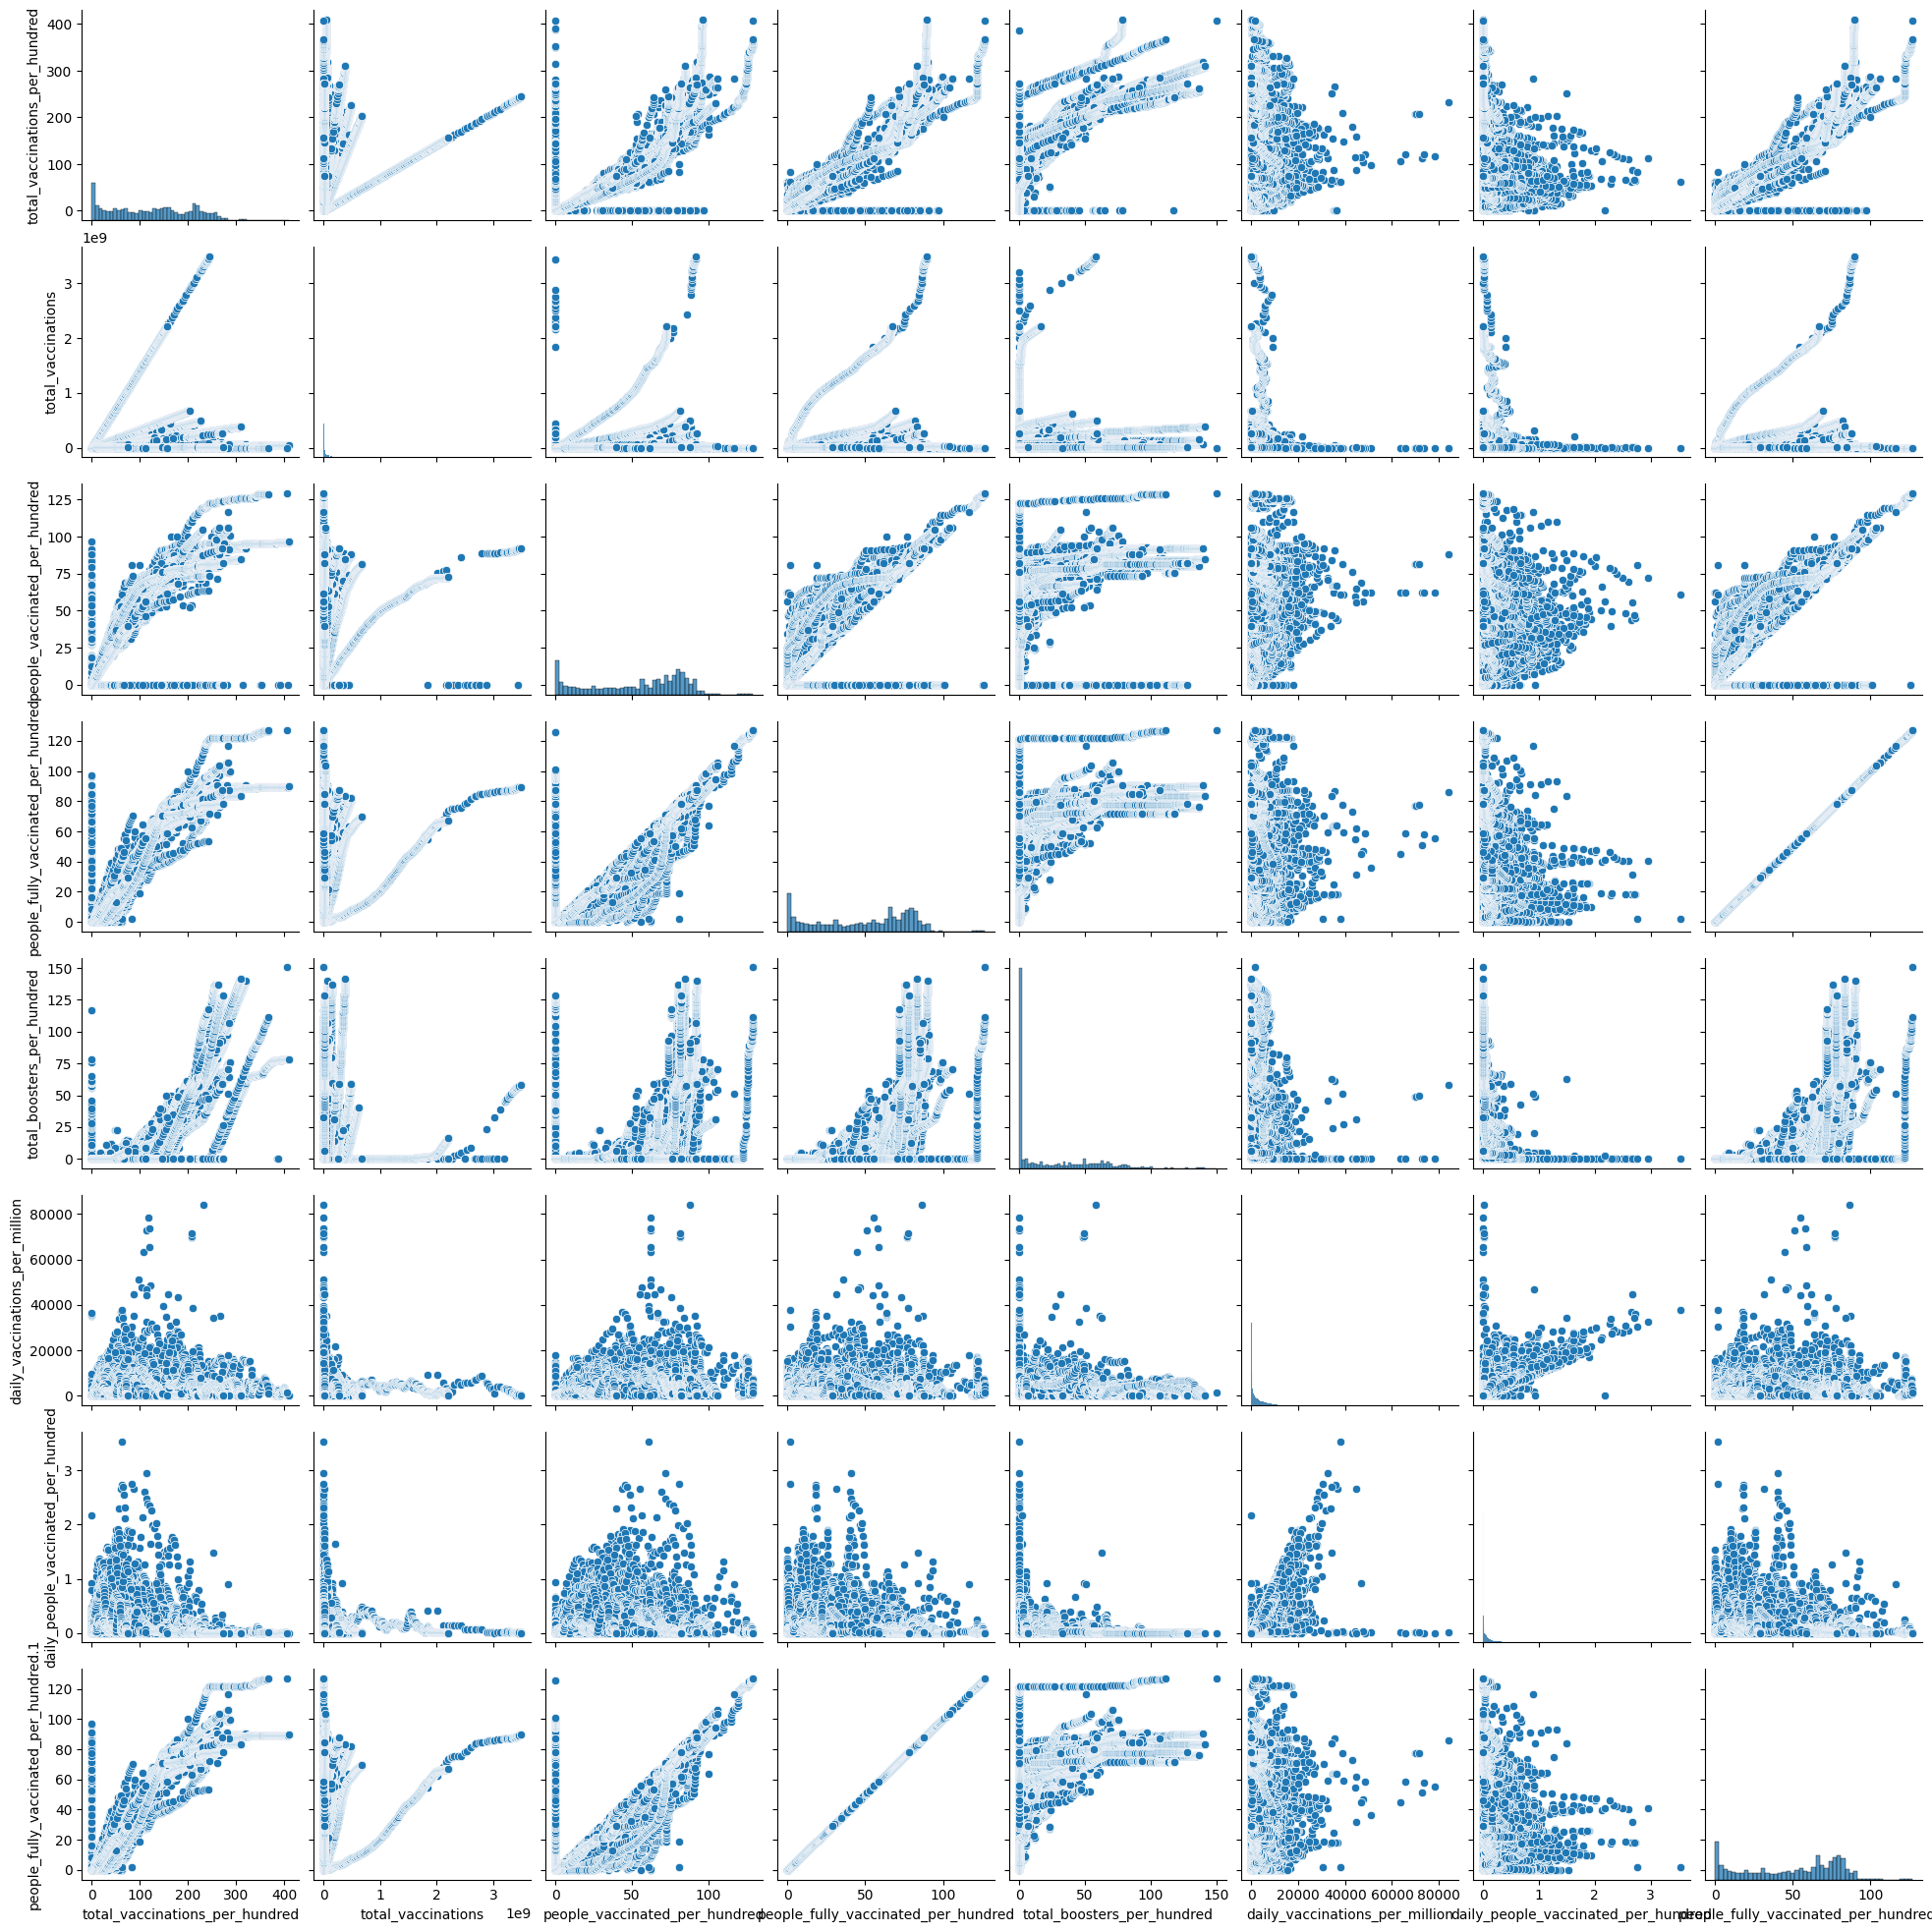

In [ ]:
# Pairplot of Numerical Features
sns.pairplot(df[numerical_cols.dropna().tolist()])
plt.show()

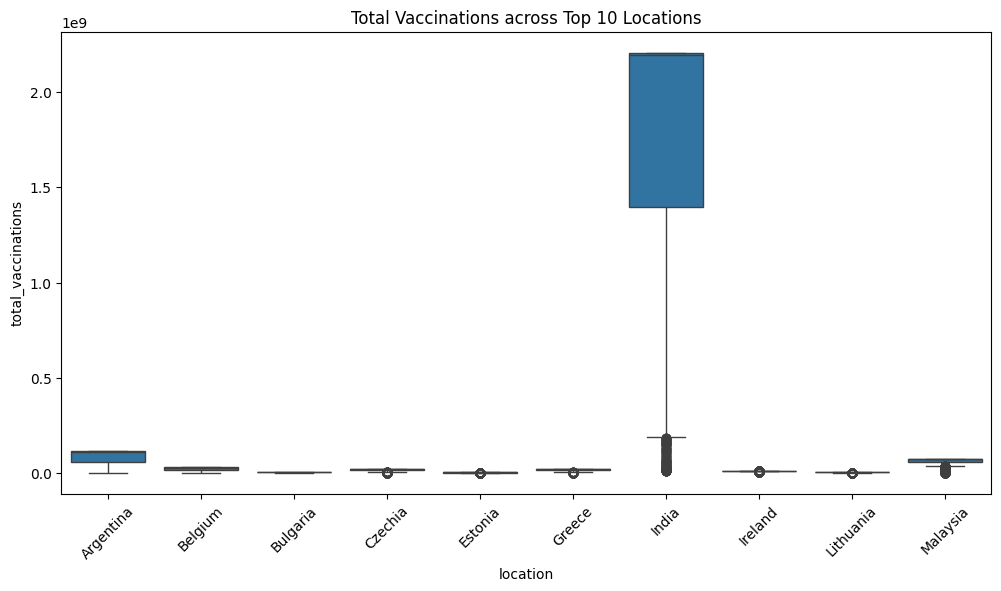

In [ ]:
# Boxplot: Total Vaccinations by Location (Top 10 for clarity)
top_locations = df['location'].value_counts().nlargest(10).index
subset_df = df[df['location'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=subset_df, x='location', y='total_vaccinations')
plt.xticks(rotation=45)
plt.title('Total Vaccinations across Top 10 Locations')
plt.show()

In [ ]:
# Grouped Statistics: Mean Vaccinations by Location
df.groupby('location')['total_vaccinations'].mean().sort_values(ascending=False).head(10)

location
China            3.026370e+09
India            1.714676e+09
United States    4.718461e+08
Brazil           2.985931e+08
Japan            2.357391e+08
Bangladesh       2.201592e+08
Pakistan         2.013558e+08
Indonesia        1.526323e+08
Germany          1.348209e+08
Iran             1.147812e+08
Name: total_vaccinations, dtype: float64

<h3> Multivariate Analysis Summary <h3>

Multivariate analysis explored relationships between multiple variables:

- Correlation Heatmap revealed:

    - Strong correlation between total_vaccinations and people_vaccinated_per_hundred.
    - daily_people_vaccinated_per_hundred and daily_vaccinations_per_million were also strongly related.

- Boxplot Analysis:

    - Substantial variation in total vaccinations across the top 10 countries.
    - Some countries had extremely high totals, creating long tails in distribution.

- Groupwise Aggregation:

    - Countries like China, India, USA lead in average total vaccinations.

- Binary Classification:

    - A binary column achieved_70_percent was created.
    - Class distribution:
        - 81 countries achieved ≥70% full vaccination.
        - 140 countries did not.

In [32]:
# Keep the latest data per country
df_latest = df.sort_values("date").drop_duplicates("location", keep="last").reset_index(drop=True)

In [33]:
# Create binary target: 1 if fully vaccinated ≥ 70%
df_latest['achieved_70_percent'] = (df_latest['people_fully_vaccinated_per_hundred'] >= 70).astype(int)

In [34]:
# Check class balance
print(df_latest['achieved_70_percent'].value_counts())

achieved_70_percent
0    140
1     81
Name: count, dtype: int64


In [35]:
# Top 15 countries by total vaccinations
top_total = df_latest.sort_values(by='total_vaccinations', ascending=False).head(15)

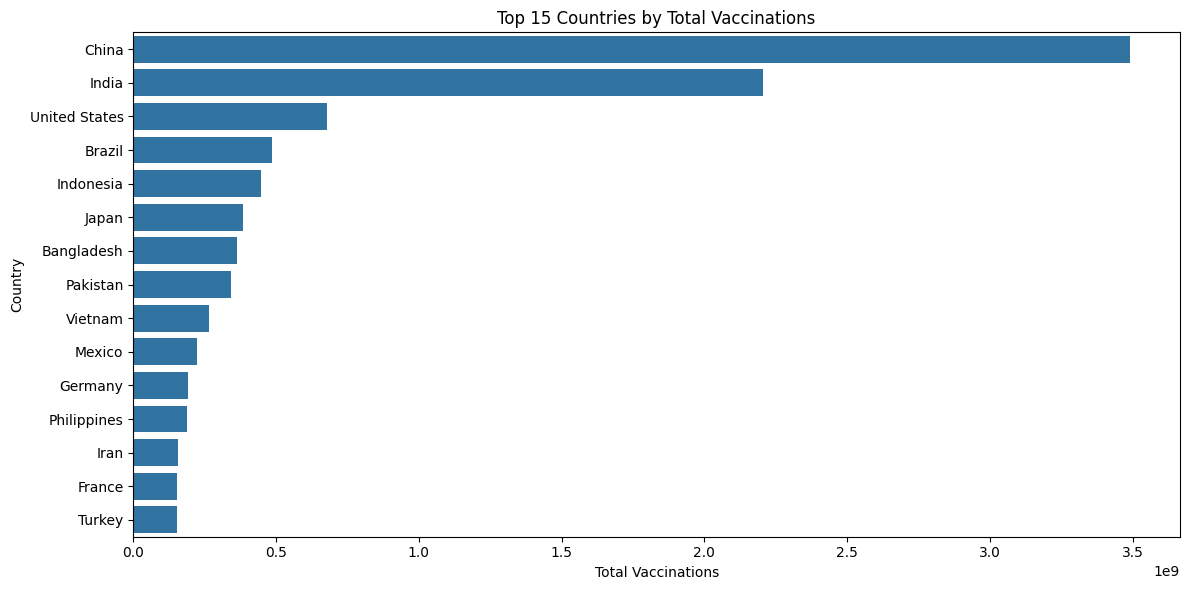

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_total, x='total_vaccinations', y='location')
plt.title("Top 15 Countries by Total Vaccinations")
plt.xlabel("Total Vaccinations")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


In [37]:
# Plot top countries by fully vaccinated per hundred
top_vax = df_latest.sort_values('people_fully_vaccinated_per_hundred', ascending=False).head(15)

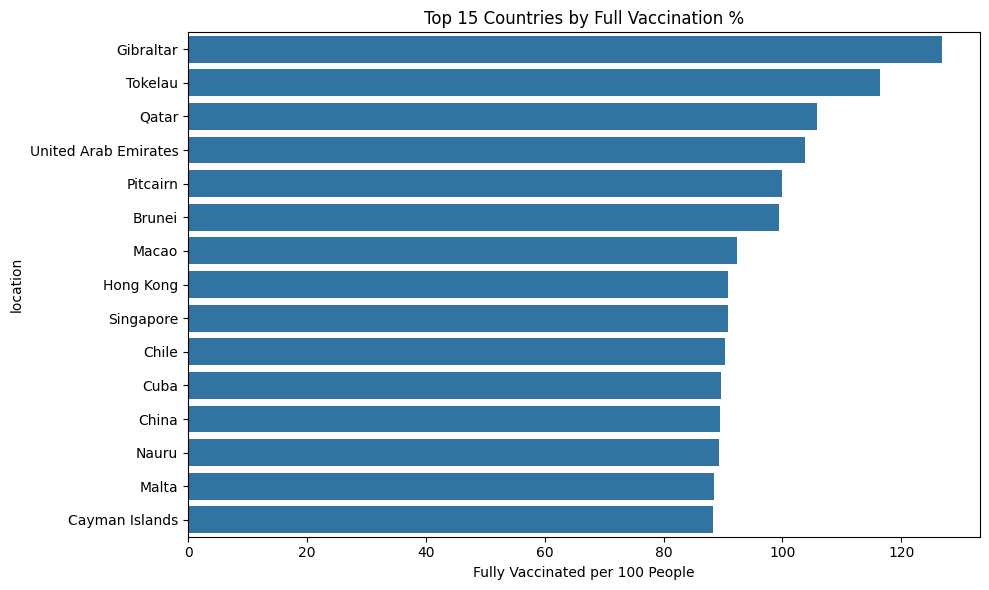

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='people_fully_vaccinated_per_hundred', y='location', data=top_vax)
plt.title("Top 15 Countries by Full Vaccination %")
plt.xlabel("Fully Vaccinated per 100 People")
plt.tight_layout()
plt.show()

# EDA Conclusion

- Countries like India, USA, China rank highest by total vaccinations.
- Small nations such as Gibraltar, Falkland Islands often lead in per-capita vaccination.
- Per-hundred vaccination is a better relative indicator of progress than total doses.
- Daily vaccination trends can be studied using line plots per country over time.

# Suggested Model:

Based on EDA:

1)	Forecast future vaccinations for a country.
    - LSTM model will be best suited for this dataset.
    - LSTM captures temporal dependencies and trends well.

2)	Classify countries into "High", "Medium", "Low" vaccination rollout categories.
    - Random Forest Classifier will be best suited for this dataset.
    - Random Forest handles multi-class problems and categorical data.
    - Random Forest provides feature importance.
    - Random Forest handles nonlinear relationships.
    - Random Forest works well with no strict assumptions.